<a href="https://colab.research.google.com/github/mchen899923/Milestone-3-Project-Results/blob/main/DS_3001_Results_RACE_AND_AGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
covid_df=pd.read_csv('Covid19_Data.csv')

In [ ]:
covid_df.head()

,cdc_report_dt,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2023/10/17,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No
1,2020/11/17,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No
2,2021/03/31,20 - 29 Years,"Black, Non-Hispanic",No,No,No,Yes
3,2021/01/12,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No
4,2020/11/17,20 - 29 Years,"Black, Non-Hispanic",Yes,No,No,No


In [ ]:
covid_df = covid_df.replace('Missing',np.nan) #drop rows with missing and unknown values
covid_df = covid_df.replace('Unknown',np.nan)
covid_df.dropna(inplace=True)

In [ ]:
covid_df['race_ethnicity_combined'].unique() #check values of race/ethnicity

array(['Black, Non-Hispanic', 'Asian, Non-Hispanic',
       'White, Non-Hispanic', 'Multiple/Other, Non-Hispanic',
       'Hispanic/Latino',
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic',
       'American Indian/Alaska Native, Non-Hispanic'], dtype=object)

In [ ]:
race_dummies =pd.get_dummies(covid_df['race_ethnicity_combined'], prefix='race', dtype=int) #one hot encode race for tree
covid_df = pd.concat([covid_df, race_dummies], axis=1)

In [ ]:
covid_df.head()

,cdc_report_dt,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,"race_American Indian/Alaska Native, Non-Hispanic","race_Asian, Non-Hispanic","race_Black, Non-Hispanic",race_Hispanic/Latino,"race_Multiple/Other, Non-Hispanic","race_Native Hawaiian/Other Pacific Islander, Non-Hispanic","race_White, Non-Hispanic"
0,2023/10/17,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No,0,0,1,0,0,0,0
1,2020/11/17,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No,0,0,1,0,0,0,0
2,2021/03/31,20 - 29 Years,"Black, Non-Hispanic",No,No,No,Yes,0,0,1,0,0,0,0
3,2021/01/12,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No,0,0,1,0,0,0,0
4,2020/11/17,20 - 29 Years,"Black, Non-Hispanic",Yes,No,No,No,0,0,1,0,0,0,0


In [ ]:
#rename one hot encode columns
covid_df = covid_df.rename(columns={
    "race_American Indian/Alaska Native, Non-Hispanic": "American Indian/Alaska Native, Non-Hispanic_Binary",
    "race_Asian, Non-Hispanic": "Asian, Non-Hispanic_Binary",
    "race_Black, Non-Hispanic": "Black, Non-Hispanic_Binary",
    "race_Hispanic": "Hispanic_Binary",
    "race_Native Hawaiian/Other Pacific Islander, Non-Hispanic": "Native Hawaiian/Other Pacific Islander, Non-Hispanic_Binary",
    "race_White, Non-Hispanic": "White, Non-Hispanic_Binary",
    "race_Multiple/Other, Non-Hispanic": "Multiple/Other, Non-Hispanic_Binary",
    "race_Hispanic/Latino": "Hispanic/Latino_Binary"
})

In [ ]:
covid_df.head()

,cdc_report_dt,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,"American Indian/Alaska Native, Non-Hispanic_Binary","Asian, Non-Hispanic_Binary","Black, Non-Hispanic_Binary",Hispanic/Latino_Binary,"Multiple/Other, Non-Hispanic_Binary","Native Hawaiian/Other Pacific Islander, Non-Hispanic_Binary","White, Non-Hispanic_Binary"
0,2023/10/17,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No,0,0,1,0,0,0,0
1,2020/11/17,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No,0,0,1,0,0,0,0
2,2021/03/31,20 - 29 Years,"Black, Non-Hispanic",No,No,No,Yes,0,0,1,0,0,0,0
3,2021/01/12,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No,0,0,1,0,0,0,0
4,2020/11/17,20 - 29 Years,"Black, Non-Hispanic",Yes,No,No,No,0,0,1,0,0,0,0


In [ ]:
# put one hot encoded columns into new dataframe
race_df=covid_df.drop(['cdc_report_dt', 'age_group','race_ethnicity_combined', 'hosp_yn', 'icu_yn','death_yn','medcond_yn'], axis=1)
race_df.head()

,"American Indian/Alaska Native, Non-Hispanic_Binary","Asian, Non-Hispanic_Binary","Black, Non-Hispanic_Binary",Hispanic/Latino_Binary,"Multiple/Other, Non-Hispanic_Binary","Native Hawaiian/Other Pacific Islander, Non-Hispanic_Binary","White, Non-Hispanic_Binary"
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [ ]:
covid_df['age_group'].unique() #check values of age

array(['20 - 29 Years', '50 - 59 Years', '10 - 19 Years', '60 - 69 Years',
       '40 - 49 Years', '30 - 39 Years'], dtype=object)

In [ ]:
age_dummies =pd.get_dummies(covid_df['age_group'], prefix='age', dtype=int) #one hot encode age for tree
covid_df = pd.concat([covid_df, age_dummies], axis=1)

In [ ]:
covid_df.head()

,cdc_report_dt,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,"American Indian/Alaska Native, Non-Hispanic_Binary","Asian, Non-Hispanic_Binary","Black, Non-Hispanic_Binary",Hispanic/Latino_Binary,"Multiple/Other, Non-Hispanic_Binary","Native Hawaiian/Other Pacific Islander, Non-Hispanic_Binary","White, Non-Hispanic_Binary",age_10 - 19 Years,age_20 - 29 Years,age_30 - 39 Years,age_40 - 49 Years,age_50 - 59 Years,age_60 - 69 Years
0,2023/10/17,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2020/11/17,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No,0,0,1,0,0,0,0,0,1,0,0,0,0
2,2021/03/31,20 - 29 Years,"Black, Non-Hispanic",No,No,No,Yes,0,0,1,0,0,0,0,0,1,0,0,0,0
3,2021/01/12,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No,0,0,1,0,0,0,0,0,1,0,0,0,0
4,2020/11/17,20 - 29 Years,"Black, Non-Hispanic",Yes,No,No,No,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
#rename one hot encode columns
covid_df = covid_df.rename(columns={
    "age_10 - 19 Years": "age_10 - 19 Years_Binary",
    "age_20 - 29 Years": "age_20 - 29 Years_Binary",
    "age_30 - 39 Years": "age_30 - 39 Years_Binary",
    "age_40 - 49 Years": "age_40 - 49 Years_Binary",
    "age_50 - 59 Years": "age_50 - 59 Years_Binary",
    "age_60 - 69 Years": "age_60 - 69 Years_Binary",
})

In [ ]:
# put one hot encoded columns into new dataframe
age_df=covid_df[['age_10 - 19 Years_Binary','age_20 - 29 Years_Binary','age_30 - 39 Years_Binary','age_40 - 49 Years_Binary','age_50 - 59 Years_Binary','age_60 - 69 Years_Binary']]
age_df.head()

,age_10 - 19 Years_Binary,age_20 - 29 Years_Binary,age_30 - 39 Years_Binary,age_40 - 49 Years_Binary,age_50 - 59 Years_Binary,age_60 - 69 Years_Binary
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [ ]:
# convert death, icu, and hosp to binary
covid_df['death_yn']=covid_df['death_yn'].str.strip().astype(str).str.title()
covid_df['icu_yn']=covid_df['icu_yn'].str.strip().astype(str).str.title()
covid_df['hosp_yn']=covid_df['hosp_yn'].str.strip().astype(str).str.title()
covid_df['death_binary'] = covid_df['death_yn'].map({'Yes': 1, 'No': 0})
covid_df['icu_binary'] = covid_df['icu_yn'].map({'Yes': 1, 'No': 0})
covid_df['hosp_binary'] = covid_df['hosp_yn'].map({'Yes': 1, 'No': 0})

In [ ]:
covid_df.head()

,cdc_report_dt,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,"American Indian/Alaska Native, Non-Hispanic_Binary","Asian, Non-Hispanic_Binary","Black, Non-Hispanic_Binary",...,"White, Non-Hispanic_Binary",age_10 - 19 Years_Binary,age_20 - 29 Years_Binary,age_30 - 39 Years_Binary,age_40 - 49 Years_Binary,age_50 - 59 Years_Binary,age_60 - 69 Years_Binary,death_binary,icu_binary,hosp_binary
0,2023/10/17,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2020/11/17,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2021/03/31,20 - 29 Years,"Black, Non-Hispanic",No,No,No,Yes,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,2021/01/12,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,2020/11/17,20 - 29 Years,"Black, Non-Hispanic",Yes,No,No,No,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [ ]:
# look at underlying medical condition, race, and age to see how likely is hospitalization

# convert medcond to binary
if 'medcond_binary' not in covid_df.columns:
    covid_df['medcond_binary'] = covid_df['medcond_yn'].replace({'No': 0, 'Yes': 1}).astype(int)

race_binary_cols = [col for col in race_df.columns if '_Binary' in col]
age_binary_cols = [col for col in age_df.columns if '_Binary' in col]

# combine all feature column names into a single flat list
feature_cols = race_binary_cols + age_binary_cols + ['medcond_binary']

# Select features for X
X = covid_df[feature_cols]

# Set the target variable y, using the already converted 'hosp_binary'
y = covid_df['hosp_binary']

/tmp/ipython-input-22936629.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_df['medcond_binary'] = covid_df['medcond_yn'].replace({'No': 0, 'Yes': 1}).astype(int)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# test for accuracy
cart = DecisionTreeClassifier(min_samples_leaf=10)
cart=cart.fit(X_train,y_train)
y_pred=cart.predict(X_test)
pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,162032,298
1,25221,284


In [48]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight="balanced") #more cases of non hospitalizations, class balance to balance that out
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

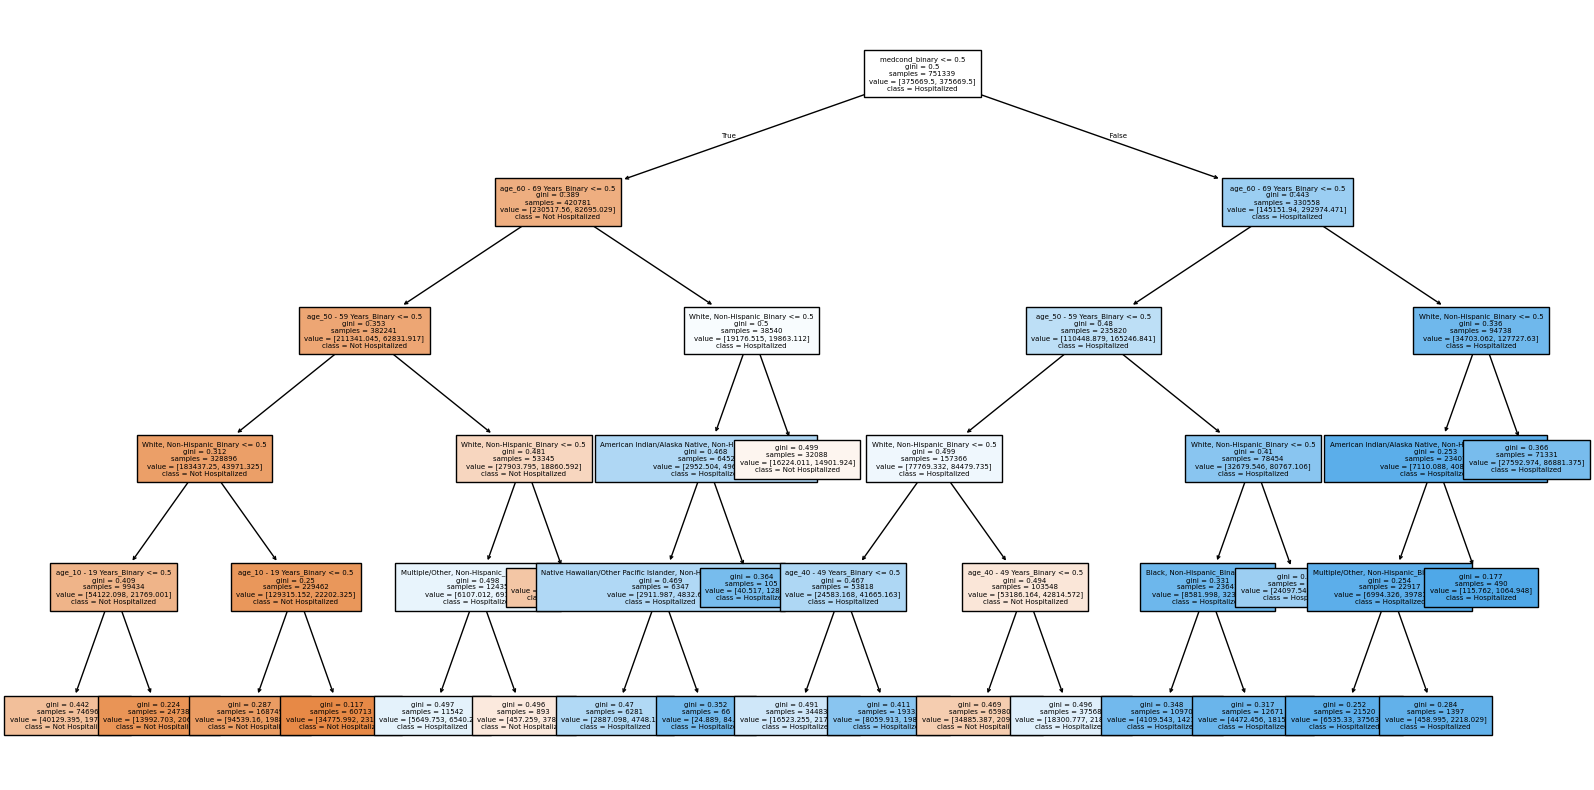

In [46]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["Not Hospitalized","Hospitalized"], fontsize=5, filled=True)
plt.show()

In [57]:
#look at underlying medical condition, age, and race to see how likely is icu
X2 = covid_df[feature_cols]

y2 = covid_df['icu_binary']

In [58]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [59]:
# test for accuracy
cart2 = DecisionTreeClassifier(min_samples_leaf=10)
cart2=cart2.fit(X2_train,y2_train)
y2_pred=cart2.predict(X2_test)
pd.crosstab(y2_test,y2_pred,rownames=['Actual'],colnames=['Predicted'])

Predicted,0
Actual,
0,179566
1,8269


In [60]:
clf = DecisionTreeClassifier(max_depth=6, random_state=42, class_weight='balanced')

clf.fit(X2_train, y2_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)

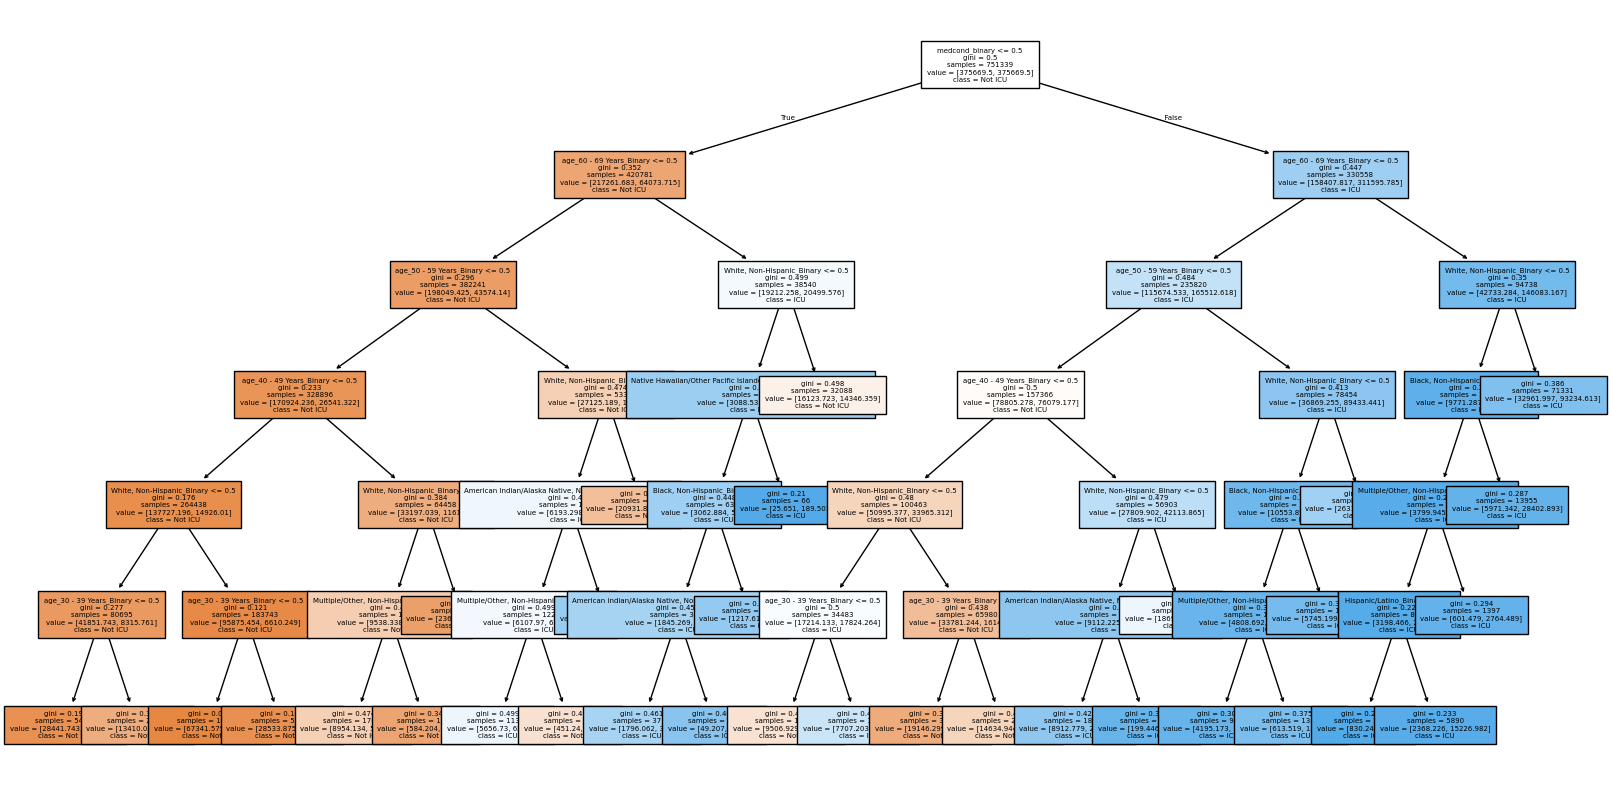

In [62]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X2.columns, class_names=["Not ICU","ICU"], fontsize=5, filled=True)
plt.show()

In [37]:
# look at underlying medical condition,age,and race to see how likely is death
X3 = covid_df[feature_cols]

y3 = covid_df['death_binary']

In [38]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [56]:
# test for accuracy
cart3 = DecisionTreeClassifier(min_samples_leaf=10)
cart3=cart3.fit(X3_train,y3_train)
y3_pred=cart3.predict(X3_test)
pd.crosstab(y3_test,y3_pred,rownames=['Actual'],colnames=['Predicted'])

Predicted,0
Actual,
0,182728
1,5107


In [63]:
clf = DecisionTreeClassifier(max_depth=6, random_state=42,class_weight='balanced')

clf.fit(X3_train, y3_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)

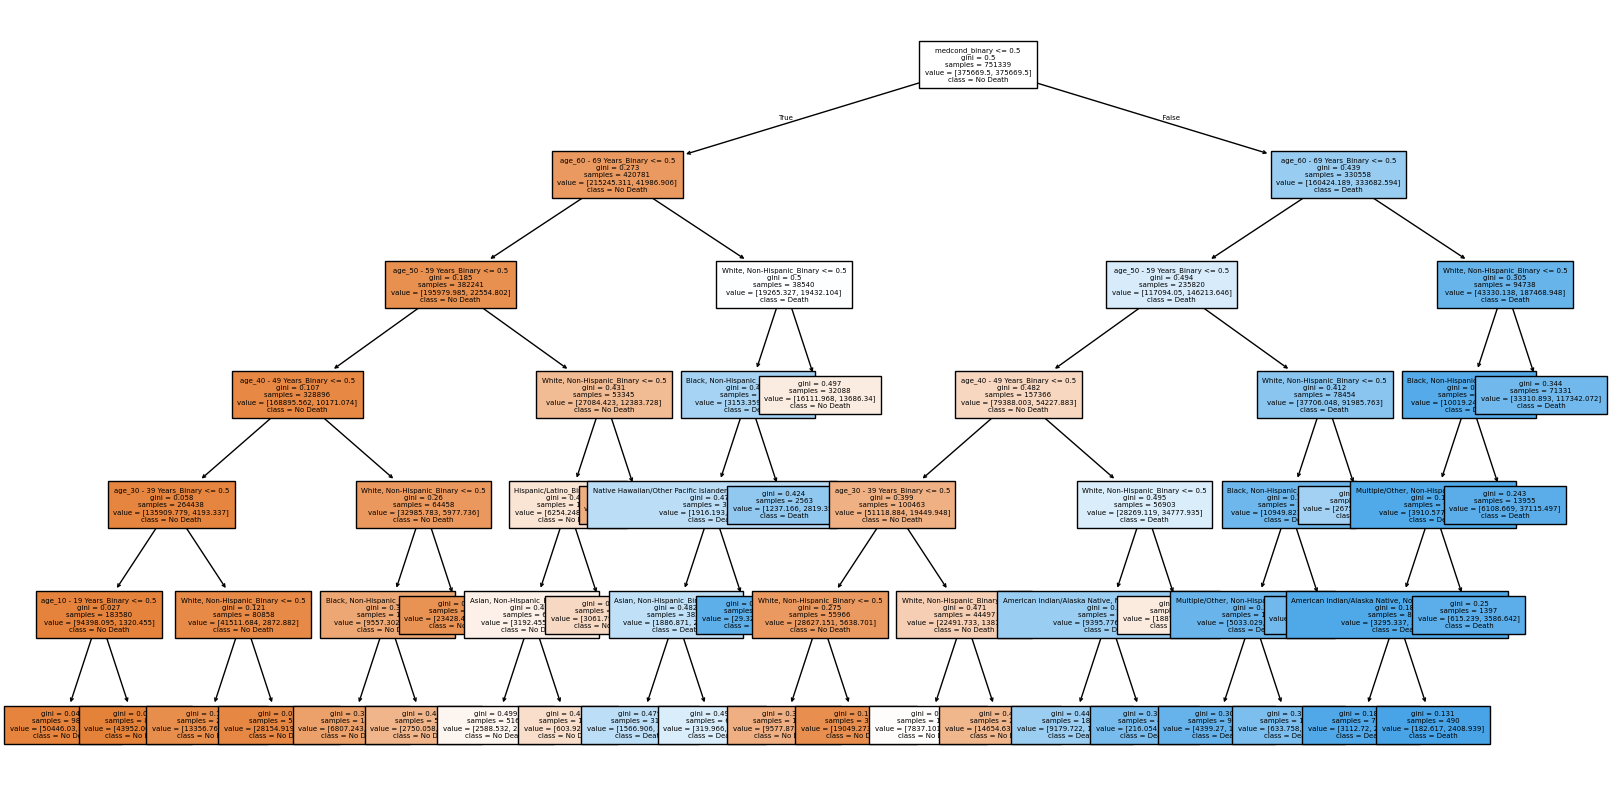

In [64]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X3.columns, class_names=["No Death","Death"], fontsize=5, filled=True)
plt.show()

In [69]:
# look at race by itself to see how likely is hospitalization
X4 = race_df
y4 = covid_df['hosp_binary']

In [68]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [70]:
# test for accuracy
cart4 = DecisionTreeClassifier(min_samples_leaf=10)
cart4=cart4.fit(X4_train,y4_train)
y4_pred=cart4.predict(X4_test)
pd.crosstab(y4_test,y4_pred,rownames=['Actual'],colnames=['Predicted'])

Predicted,0
Actual,
0,162330
1,25505


In [71]:
clf = DecisionTreeClassifier(max_depth=6, random_state=42,class_weight='balanced')

clf.fit(X4_train, y4_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)

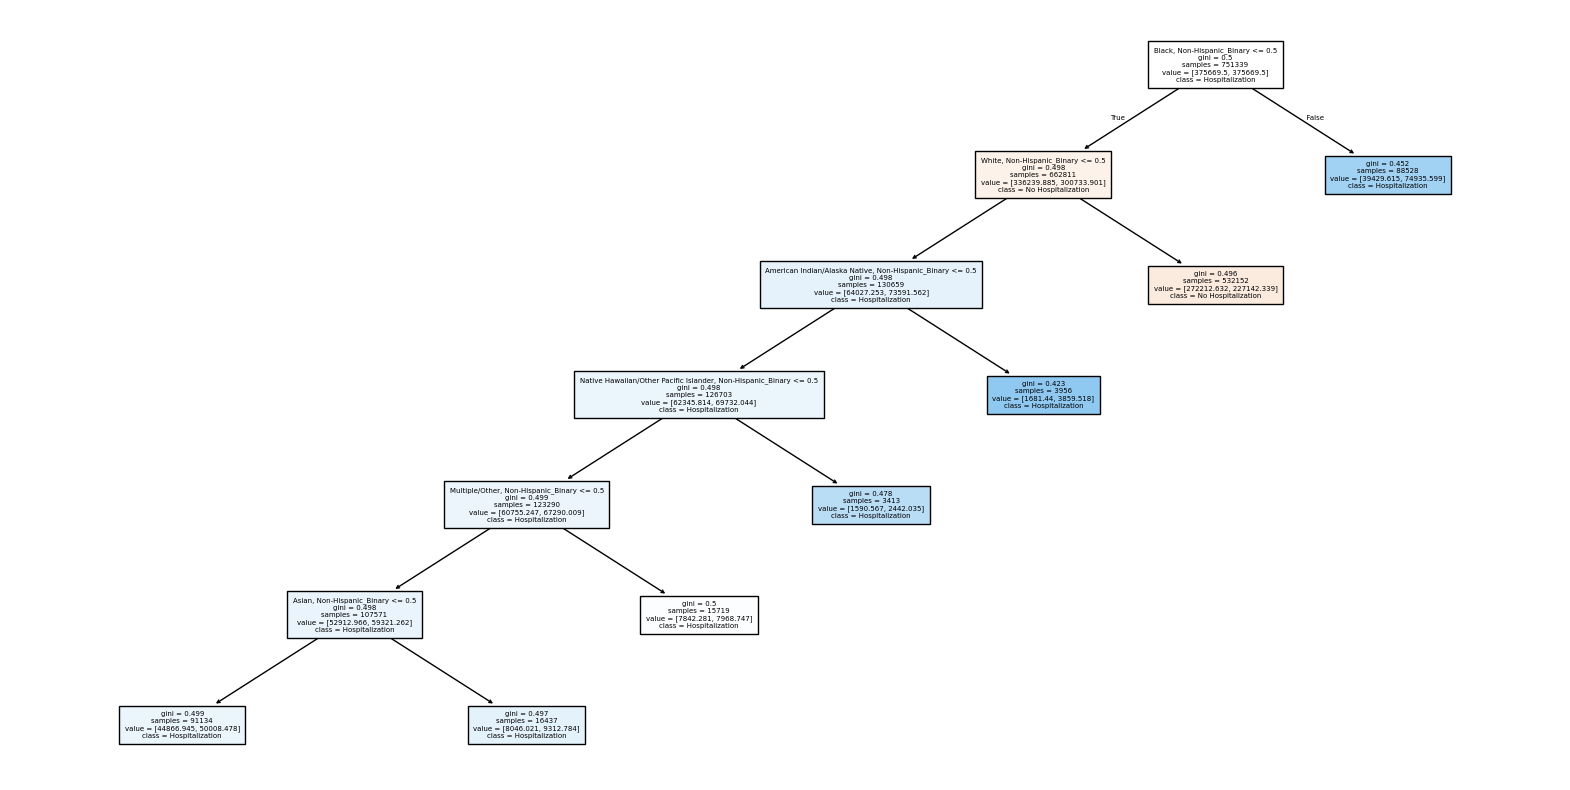

In [72]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X4.columns, class_names=["No Hospitalization","Hospitalization"], fontsize=5, filled=True)
plt.show()

In [ ]:
# note: if all trees are done and there's time left, feel free to do some cross validation and/or test for robustness and accuracy